In [1]:
import pandas as pd
from config import api_key
import matplotlib.pyplot as plt
import requests

In [2]:
ticker = "AMZN"
start_date = "2000-01-01"

In [3]:
url = f'https://www.quandl.com/api/v3/datasets/EOD/{ticker}?start_date={start_date}&api_key={api_key}'
#url = f'https://www.quandl.com/api/v3/datasets/EOD/{ticker}&api_key={api_key}'

In [4]:
response = requests.get(url).json()
#response

In [5]:
stock_data = response['dataset']['data']

In [6]:
date = []
close = []

for d in stock_data:
    date.append(d[0])
    close.append(d[4])

In [7]:
data_dict = {'Date': date, 'Close': close}

data_df = pd.DataFrame(data_dict)
data_df.head()

,Date,Close
0,2021-03-09,3062.85
1,2021-03-08,2951.95
2,2021-03-05,3000.46
3,2021-03-04,2977.57
4,2021-03-03,3005.00


In [8]:
data = data_df.sort_values(by='Date', ascending=True).reset_index().drop(columns=['index'])
data.head()

,Date,Close
0,2000-01-03,89.38
1,2000-01-04,81.94
2,2000-01-05,71.75
3,2000-01-06,65.56
4,2000-01-07,69.56


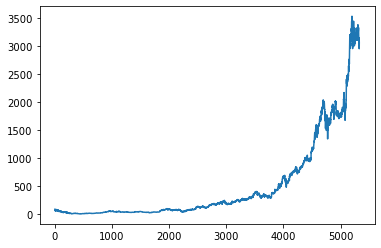

In [9]:
#plot close price
data['Close'].plot()

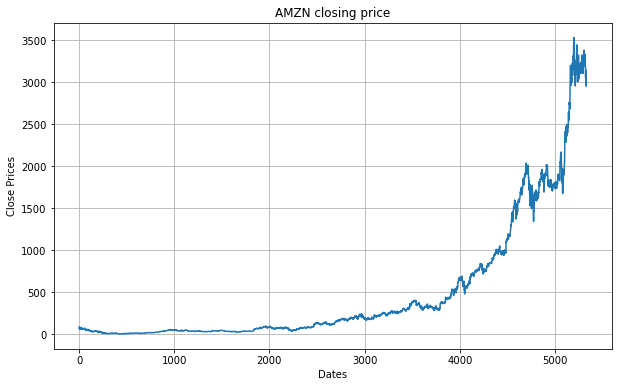

In [10]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title(f'{ticker} closing price')
plt.show()

## build the predictive model

In [11]:
data = data[['Date', 'Close']]

data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2000-01-03,89.38
1,2000-01-04,81.94
2,2000-01-05,71.75
3,2000-01-06,65.56
4,2000-01-07,69.56


In [13]:
from fbprophet import Prophet

In [14]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [22]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-03,82.806590,-130.206284,207.700059,82.806590,82.806590,-43.133254,-43.133254,-43.133254,-25.752456,...,-2.178505,-2.178505,-2.178505,-15.202293,-15.202293,-15.202293,0.0,0.0,0.0,39.673336
1,2000-01-04,82.732019,-120.404251,212.137680,82.732019,82.732019,-41.105773,-41.105773,-41.105773,-25.752456,...,-0.440645,-0.440645,-0.440645,-14.912672,-14.912672,-14.912672,0.0,0.0,0.0,41.626246
2,2000-01-05,82.657448,-141.533300,200.495431,82.657448,82.657448,-40.379108,-40.379108,-40.379108,-25.752456,...,-0.023158,-0.023158,-0.023158,-14.603494,-14.603494,-14.603494,0.0,0.0,0.0,42.278340
3,2000-01-06,82.582877,-123.459242,204.342632,82.582877,82.582877,-40.638151,-40.638151,-40.638151,-25.752456,...,-0.605947,-0.605947,-0.605947,-14.279748,-14.279748,-14.279748,0.0,0.0,0.0,41.944726
4,2000-01-07,82.508306,-122.012457,205.999727,82.508306,82.508306,-42.888398,-42.888398,-42.888398,-25.752456,...,-3.189858,-3.189858,-3.189858,-13.946083,-13.946083,-13.946083,0.0,0.0,0.0,39.619908


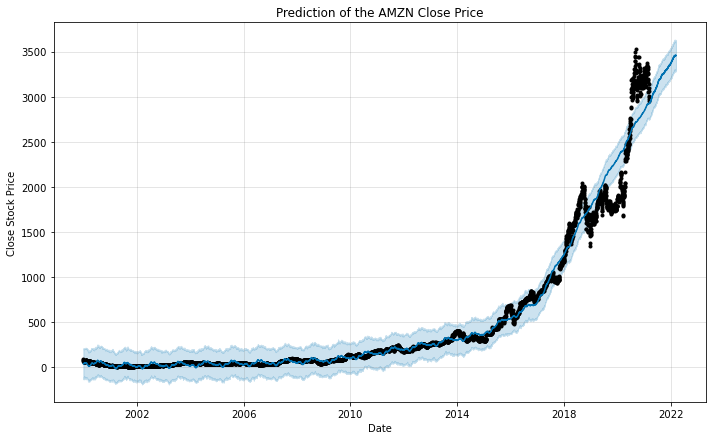

In [18]:
figure = m.plot(prediction)
plt.title(f"Prediction of the {ticker} Close Price")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
figure.savefig(f'../plots/{ticker}_figure.png')